In [1]:
!pip install kagglehub

Dataset downloaded to: /kaggle/input/housedata
R² Score: 0.4621


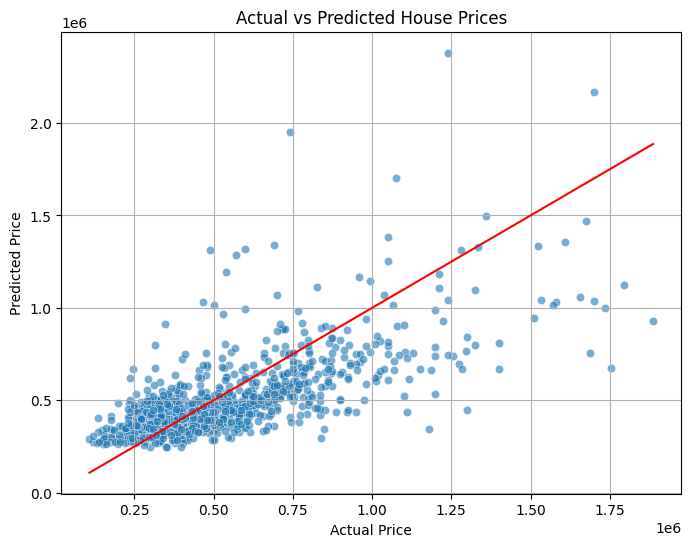

In [10]:
# Install kagglehub if needed
# !pip install kagglehub

import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
path = kagglehub.dataset_download("shree1992/housedata")
print("Dataset downloaded to:", path)

csv_path = os.path.join(path, "data.csv")
data = pd.read_csv(csv_path)

data = data[(data['price'] > 100000) & (data['price'] < 2000000)]
data = data[data['sqft_living'] < 10000]
data = data[data['bedrooms'] < 10]
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated']
target = 'price'

X = data[features]
y = np.log1p(data[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)


mse = mean_squared_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_actual, y=y_pred, alpha=0.6)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()




